# Modeling the augmented data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd

result = pd.read_csv('/content/drive/My Drive/WorkOnMergedData/full_aug_data.csv')

In [3]:
result.head()

,Unnamed: 0,texts,labels
0,0,Yesterday I lowered the price of an item to ma...,Fulfillment By Amazon
1,1,I got my new credit card and before I could up...,Fulfillment By Amazon
2,2,I sent an FBA shipment on November 26. They sh...,Fulfillment By Amazon
3,3,"Hi, I need to know the products stock in Selle...",Fulfillment By Amazon
4,4,Just here to vent at the Asia based Seller Sup...,Fulfillment By Amazon


In [4]:
result.isna().sum()

Unnamed: 0    0
texts         1
labels        0
dtype: int64

In [5]:
result.dropna(axis=0, inplace=True)

In [6]:
result.isna().sum()

Unnamed: 0    0
texts         0
labels        0
dtype: int64

In [7]:
result.head()

,Unnamed: 0,texts,labels
0,0,Yesterday I lowered the price of an item to ma...,Fulfillment By Amazon
1,1,I got my new credit card and before I could up...,Fulfillment By Amazon
2,2,I sent an FBA shipment on November 26. They sh...,Fulfillment By Amazon
3,3,"Hi, I need to know the products stock in Selle...",Fulfillment By Amazon
4,4,Just here to vent at the Asia based Seller Sup...,Fulfillment By Amazon


In [8]:
result.labels.unique()

array(['Fulfillment By Amazon', 'Amazon Sponsored Products',
       'Account Health', 'Selling on Amazon', 'Global Selling', 'Groups',
       'Amazon Marketplace Web Service (MWS)', 'Login With Amazon',
       'Amazon Pay', 'Amazon Custom', 'US Announcements', 'Site Feedback',
       'Health,Safety,Sustainability,Security & Compliance',
       'Financial Management', 'Product Sourcing', 'Human Resources',
       'Amazon Specific', 'Flowster-specific', 'Software & Tools',
       'Fulfillment', 'Traffic Sources', 'Management', 'Misc Topics',
       'eCommerce Marketplaces', 'Store & Website Management'],
      dtype=object)

In [9]:
categories = ['Fulfillment By Amazon', 'Amazon Sponsored Products',
       'Account Health', 'Selling on Amazon', 'Global Selling', 'Groups',
       'Amazon Marketplace Web Service (MWS)', 'Login With Amazon',
       'Amazon Pay', 'Amazon Custom', 'US Announcements', 'Site Feedback',
       'Health,Safety,Sustainability,Security & Compliance',
       'Financial Management', 'Product Sourcing', 'Human Resources',
       'Amazon Specific', 'Flowster-specific', 'Software & Tools',
       'Fulfillment', 'Traffic Sources', 'Management', 'Misc Topics',
       'eCommerce Marketplaces', 'Store & Website Management']

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

X = result.texts
y = result.labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 42)

In [12]:
logreg = Pipeline([('vect', TfidfVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', LogisticRegression(n_jobs=1, C=1e5, max_iter=200)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res31 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.6682113067655236
                                                    precision    recall  f1-score   support

                             Fulfillment By Amazon       0.76      0.75      0.75       161
                         Amazon Sponsored Products       0.79      0.39      0.52        28
                                    Account Health       0.63      0.68      0.65        25
                                 Selling on Amazon       0.53      0.60      0.57        53
                                    Global Selling       0.91      0.97      0.94        32
                                            Groups       0.85      0.72      0.78        39
              Amazon Marketplace Web Service (MWS)       1.00      0.60      0.75         5
                                 Login With Amazon       0.97      0.95      0.96        41
                                        Amazon Pay       1.00      0.84      0.91        19
                                     Amazon Custom 

In [15]:
logreg = Pipeline([('vect', TfidfVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', LogisticRegression(n_jobs=1, C=1000, max_iter=200)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res31 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.6728452270620945
                                                    precision    recall  f1-score   support

                             Fulfillment By Amazon       0.79      0.76      0.77       161
                         Amazon Sponsored Products       0.92      0.39      0.55        28
                                    Account Health       0.62      0.64      0.63        25
                                 Selling on Amazon       0.57      0.62      0.59        53
                                    Global Selling       0.94      0.97      0.95        32
                                            Groups       0.88      0.72      0.79        39
              Amazon Marketplace Web Service (MWS)       1.00      0.80      0.89         5
                                 Login With Amazon       1.00      0.95      0.97        41
                                        Amazon Pay       1.00      0.74      0.85        19
                                     Amazon Custom 

In [13]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = { 'tfidf__norm': ['l2', 'l1'],
              'clf__C': np.linspace(0.0001, 100, 20), 
              'clf__max_iter': [200, 300, 400]}
grid_search = GridSearchCV(logreg, parameters)
grid_search.fit(X_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'clf__C': 10.526405263157894, 'clf__max_iter': 200, 'tfidf__norm': 'l2'}
best scrores:  0.7039441805143818


In [16]:
logreg = Pipeline([('vect', TfidfVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', LogisticRegression(n_jobs=1, C=10.526405263157894, max_iter=200)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res31 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.6867469879518072
                                                    precision    recall  f1-score   support

                             Fulfillment By Amazon       0.80      0.80      0.80       161
                         Amazon Sponsored Products       0.79      0.39      0.52        28
                                    Account Health       0.62      0.60      0.61        25
                                 Selling on Amazon       0.63      0.60      0.62        53
                                    Global Selling       0.93      0.88      0.90        32
                                            Groups       0.88      0.74      0.81        39
              Amazon Marketplace Web Service (MWS)       1.00      0.60      0.75         5
                                 Login With Amazon       1.00      0.95      0.97        41
                                        Amazon Pay       0.93      0.68      0.79        19
                                     Amazon Custom 

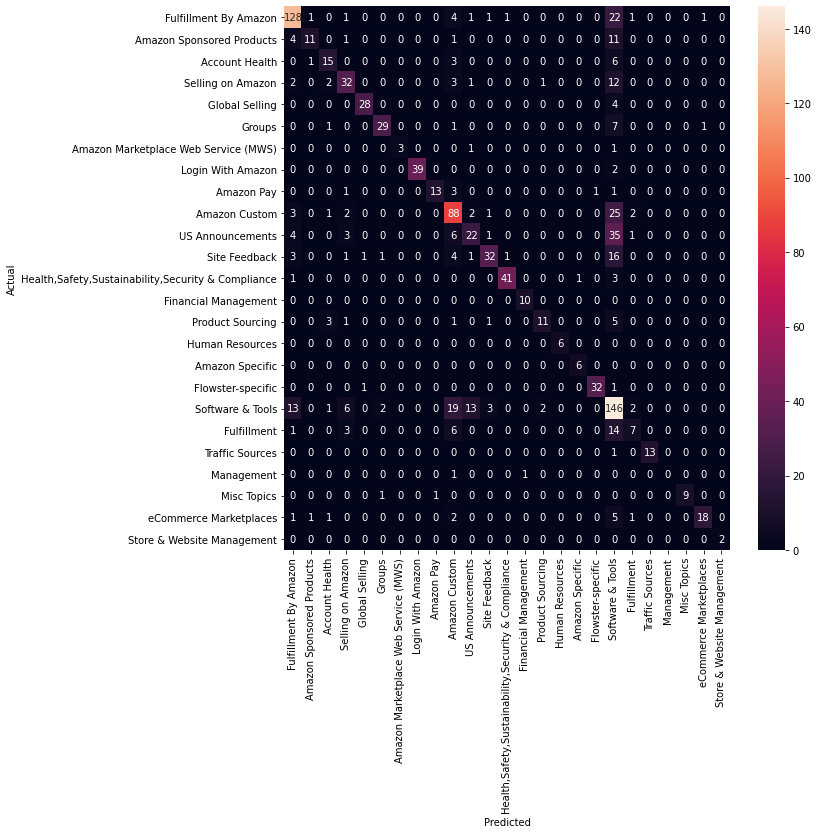

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- There are some topics that gets misqualified due to lack of training data.

In [18]:
X_test

4597     Hi all Recently we got a message from our cust...
8355     Two different listings… two different colors! ...
7412     i had to paid the amazon seller fee 40$ ready ...
8983     i ’ m working on hiring my first va and now wo...
8055     We’ve listened to your feedback and have impro...
                               ...                        
10024     3 Get it here : https :// in . time 3 S OP Ov...
5030     Hey  everyone  !!!   opps  long  time seller  ...
3319     I have about 4500 canisters or tubes of these ...
1981     Thanks in advance for whoever is taking their ...
7498     I am just starting with Amazon Pay, and I find...
Name: texts, Length: 1079, dtype: object

In [19]:
# Text from Product Sourcing category, Link : https://forum.flowster.app/t/price-checker-2-competitor-storefront-extraction/1411
# 1. Clean text
new_text = 'Hi! We are new to the forum and are going through the Product Sourcing for Professionals SOPs. We have a question on the Product Extraction workflow process using PC2: we have downloaded the free version and it doesn’t have the button that says ‘Amazon Browser/Searches’. Do we need to purchase the full PC2 package to get this feature? Thanks for your help in advance!'
#cleaned_text = clean_text(new_text)

In [20]:
# 2. Vectorize the text + 3. Predict the category
predict_test = logreg.predict([new_text])

In [21]:
print(predict_test)

['Product Sourcing']


In [22]:
test_text = "Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."
predict_test = logreg.predict([test_text])
print(predict_test)

['Fulfillment By Amazon']


In [25]:
# Selling on amazon category
test_text = "Just wanted to get feedback from other sellers. Since July 2, Ive had a huge decrease in sales. Anybody else experiencing the same issue?"
predict_test = logreg.predict([test_text])
print(predict_test)

['Fulfillment By Amazon']


In [27]:
# Selling on amazon category
test_text = "I just had a buyer(actually a seller also) named Vel Vish - Velbooks, a lady named Mara return a totally different copy of the same title that I had sent.\
The copy I sent was listed in used very good condition and stated in the description that it had a very small chip in the rear of the dust jacket."

predict_test = logreg.predict([test_text])
print(predict_test)

['Selling on Amazon']
